[Previous Notebook](Part_2.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[Home Page](../Start_Here.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;

# Introduction to Deep Learning - Residual Networks 

In this notebook, participants will be introduced to Residual Networks, and it's terminologies.

**Contents of the this notebook:**

- [Residual Networks](#Residual-Networks)
- [Residual Blocks](##Residual-Blocks)
- [Building Resnet](#Building-our-Resnet)


**By the end of this notebook participants will:**

- Understand the need for Residual Networks
- Understand Resnets  
- Write own Resnet Classifier and train it.

# Residual Networks

In CNN's, we learned that the learning is hierarchical, each increase in the number of layers results in more complex features being learned by the layers. But despite this, it is shown empirically that there is a maximum threshold for depth with the traditional CNN model.

In a paper titled [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf) researchers from Microsoft pointed out the following :
<img src="images/resnet.PNG">

The failure of the 56-layer CNN could be blamed on the optimization function, initialization of the network, or the famous vanishing/exploding gradient problem. Vanishing gradients are exceptionally easy to blame for this.

But what is **Vanishing Gradient**? Now when we do Back-propagation, the gradients tend to get smaller and smaller as we keep on moving backwards in the network. This means that the neurons in the earlier layers learn very slowly as compared to the neurons in the later layers in the hierarchy. The earlier layers in the network are slowest to train.

Earlier layers in the network are essential because they are responsible for learning and detecting the simple patterns and are actually the building blocks of our network. Obviously, if they give improper and inaccurate results, then how can we expect the next layers and the complete network to perform nicely and produce accurate results.


The problem of training very deep networks has been alleviated with the introduction of a new neural network layer — The Residual Block.

**Optional - The Degradation Problem:** 

The degradation problem suggests that the solvers might have difficulties in approximating identity mappings by multiple nonlinear layers with the residual learning reformulation. 

Let us consider network A having $n$ layers and Network B having $m$ layers given that $  n > m $ , if Network A perform poorly relative to Network B, one might argue Network A being larger than Network B, if it could map an Identity Function for the First $ ( n-m ) $ layers, then it would have performed in par with Network B. Still, it doesn't learn it due to the Vanishing Gradients problems, so here when we use Residual Networks, the network gets the Input along with the learning on the Residual and if the Input Function was the Appropriate Function, it could quickly change the weights of the Residual Function to be Zero.


# Residual Block 

In residual block the activation of a layer is fast-forwarded to a deeper layer in the neural network. Residual Blocks help in the flow of information from the initial layers to the final layers. This is done by the introduction of skip connections, as seen in the image below.

*Let us consider $H(x)$  as an underlying mapping to be fit by a few stacked layers (not necessarily the entire net), with $x$ denoting the inputs to the first of these layers. If one hypothesizes that multiple nonlinear layers can asymptotically approximate complicated functions, then it is equivalent to hypothesize that they can asymptotically approximate the residual functions* 

i.e., $H(x) − x$ (assuming that the input and output are of the same dimensions). 

So rather than expecting the stacked layers to approximate $H(x)$, we explicitly let these layers approximate a residual function. 

$F(x) = H(x) − x$. 

The original function thus becomes $F(x)+x$

*Although both models should be able to approximate the desired functions asymptotically, the ease of learning might be different. This reformulation is motivated by the counterintuitive phenomena about the degradation problem. As we discussed above, if the added layers can be constructed as identity mappings, a deeper model should have training error no greater than its shallow counterpart. *

<img src="images/resblock.PNG">

With this, the increase in the number of layers adds to the improvements in accuracy. Here are some results from the paper:

<img src="images/stats.png">

Now let us see how to write a Residual Block in Keras.

## Building our Residual Network

## Image Classification on types of clothes  

####  Step -1 : Data 

We will be using the **F-MNIST ( Fashion MNIST )** dataset. This dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

<img src="images/fashion-mnist.png" alt="Fashion MNIST sprite"  width="600">

In [1]:
# Import Necessary Libraries

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
total_vram = 9314
limit_target = 1024
fraction = total_vram/limit_target
config.gpu_options.per_process_gpu_memory_fraction = fraction # % of total memory per gpu to use. 0.2 will use 20% but then uses 25%
config.gpu_options.allow_growth = False # init allocate very little and expand if needed (might be better to allocate n and not allow growth )
session = InteractiveSession(config=config)

In [3]:
# Let's Import the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
#Defining Class Names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Printing the Size of our Dataset

#Print Array Size of Training Set 
print("Size of Training Images :"+str(train_images.shape))
#Print Array Size of Label
print("Size of Training Labels :"+str(train_labels.shape))

#Print Array Size of Test Set 
print("Size of Test Images :"+str(test_images.shape))
#Print Array Size of Label
print("Size of Test Labels :"+str(test_labels.shape))

#Let's See how our Outputs Look like 
print("Training Set Labels :"+str(train_labels))
#Data in the Test Set
print("Test Set Labels :"+str(test_labels))

Size of Training Images :(60000, 28, 28)
Size of Training Labels :(60000,)
Size of Test Images :(10000, 28, 28)
Size of Test Labels :(10000,)
Training Set Labels :[9 0 0 ... 3 0 5]
Test Set Labels :[9 2 1 ... 8 1 5]


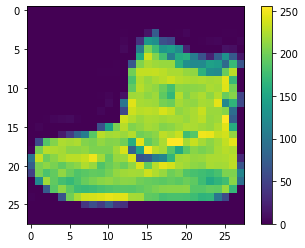

In [6]:
# Data Pre-processing 

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

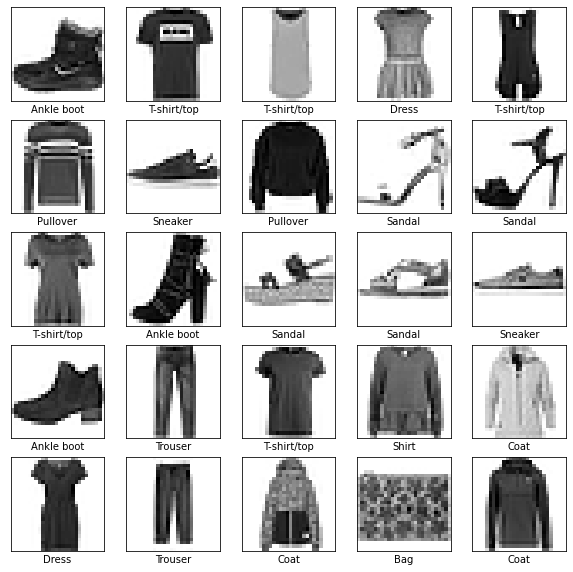

In [8]:
# Let's Print to Veryify if the Data is of the correct format.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

## Model : 

Let's build a Resnet Model with Keras and train it.

We will be using two kinds of Residual Blocks :
    - Identity Block 
    - Convolution Block
    
#### Identity Block :     

In the *Identity Block* we have a skip connection with no change in input. 

<img src="images/identity.png">


#### Convolution Block : 

Convolutional block is almost same as identity block but there is a convolutional layer in short-cut path to just change the dimension such that the dimension of input and output matches.

<img src="images/conv.png">


Let's Start building the Identity Block :

In [10]:
def identity_block(X, f, filters, stage, block):
    
    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # A Path is a Block of Conv followed by Batchnormalization and Actication
    # Save the input value
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

### Convolution Block 

Notice the only change we need to do is adding a convolution and batch normalisation for the input data to match the output dimension. 

This can be done by adding the following lines : 

```python
##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)
```

In [11]:
def convolutional_block(X, f, filters, stage, block, s=2):

    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [13]:
def ResNet(input_shape = (28, 28, 1), classes = 10):
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(shape=input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2,2), padding='same')(X)

    # Output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet')

    return model

In [14]:
from tensorflow.keras import backend as K
K.clear_session()
model = ResNet(input_shape = (28, 28, 1), classes = 10)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 32)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 28s 463us/sample - loss: 0.5095 - accuracy: 0.8279
Epoch 2/5
60000/60000 [==============================] - 24s 402us/sample - loss: 0.3328 - accuracy: 0.8795
Epoch 3/5
60000/60000 [==============================] - 24s 398us/sample - loss: 0.3192 - accuracy: 0.8883
Epoch 4/5
60000/60000 [==============================] - 25s 419us/sample - loss: 0.2866 - accuracy: 0.8978
Epoch 5/5
60000/60000 [==============================] - 24s 397us/sample - loss: 0.2390 - accuracy: 0.9105


In [17]:
#Evaluating the Model using the Test Set

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 2s - loss: 0.2659 - accuracy: 0.8695

Test accuracy: 0.8695


## Making Predictions : 

In [18]:
# Making Predictions from the test_images

predictions = model.predict(test_images)


In [19]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)

# Helper Functions to Plot Images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array,true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

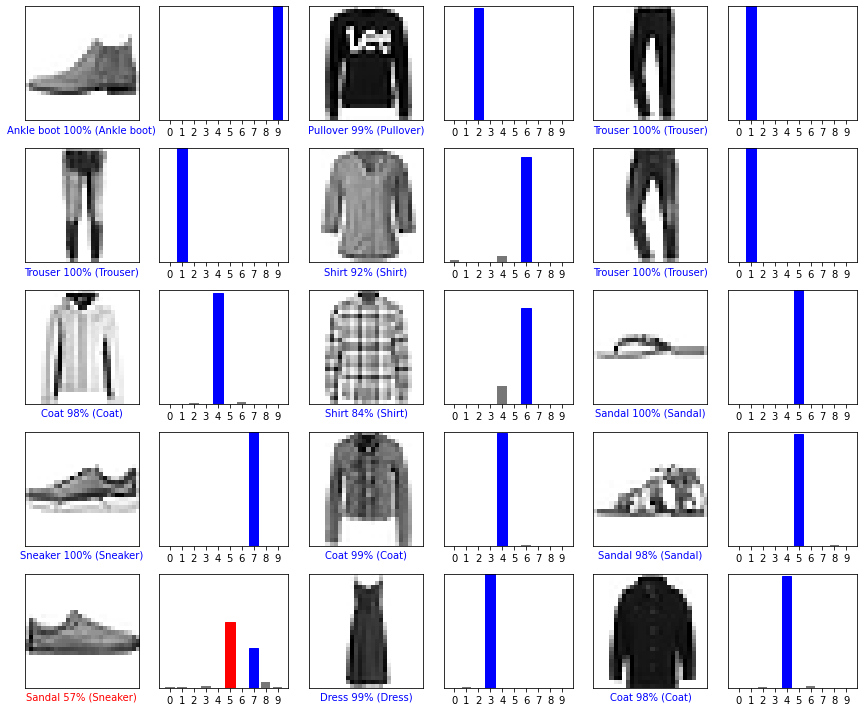

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Conclusion : 

Running both our models for 5 Epochs here is a table comparing them : 

|  Model   | Train Accuracy  | Train Loss  | Test Accuracy | Test Loss |
|----------|-----------------|-------------|---------------|-----------|
| Fully Connected Network - After 5 Epochs  |            0.8923 |       0.2935 |       0.8731  |     0.2432|           
| Convolutional Network - After 5 Epochs  |              0.8860|       0.3094 |         0.9048 |       0.1954 | 
| Residual Network - After 5 Epochs | 0.9064| 0.2610 | 0.8713 | 0.3398|

* Note : These Values can be different when you run it.

So, from the table above we can conclude that for this example how CNNs are efficient compared to other Machine Learning algorithms when it comes to image processing tasks.

Congrats on coming this far, now that you are introduced to Machine Learning and Deep Learning, you can get started on the domain specific problem accessible through the Home Page.

## Important:
<mark>Shutdown the kernel before clicking on “Next Notebook” to free up the GPU memory.</mark>


# Reference 

[The Vanishing Gradient Problem](https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257)

[Introduction to ResNets](https://towardsdatascience.com/introduction-to-resnets-c0a830a288a4)

[Hitchhiker’s Guide to Residual Networks (ResNet) in Keras](https://towardsdatascience.com/hitchhikers-guide-to-residual-networks-resnet-in-keras-385ec01ec8ff)

[Previous Notebook](CNN's.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
[Home Page](../Start_Here.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;